2 Getting Started with Image Processing with Python.
Introduction to Python Imaging Library(PIL)
2.1 Exercise - 1:
Complete all the Task.
1. Read and display the image.
• Read the image using the Pillow library and display it.
• You can also use matplotlib to display the image.
2. Display only the top left corner of 100x100 pixels.
• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.
3. Show the three color channels (R, G, B).
• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}
4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:
• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

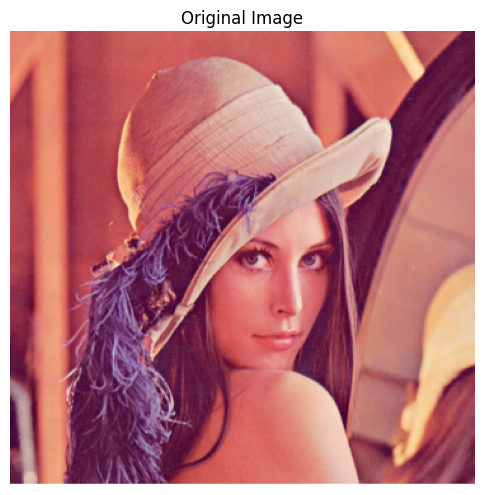

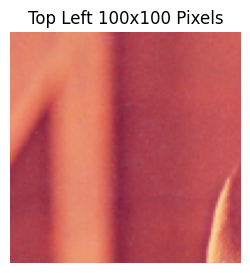

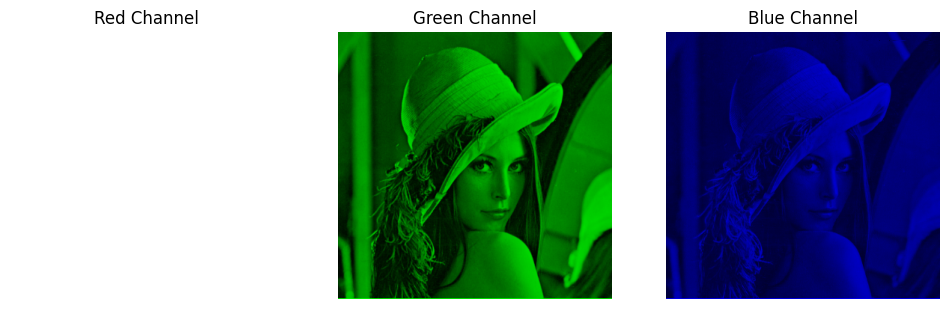

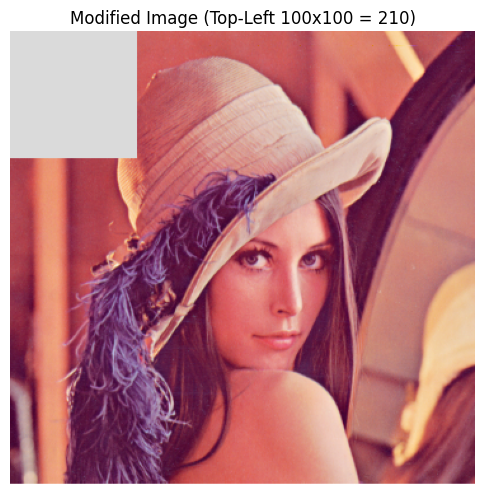

In [7]:
#2330784
#Pramdip Shrestha
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Now ,Loading and display the image
image_path = '/content/drive/MyDrive/Photos/lenna_image.png'
image = Image.open(image_path)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Here, To extract and display the top-left 100x100 pixels
image_array = np.array(image)
top_left_corner = image_array[:100, :100]
plt.figure(figsize=(3, 3))
plt.imshow(top_left_corner)
plt.title("Top Left 100x100 Pixels")
plt.axis("off")
plt.show()

# Separating and displaying R, G, B channels
r_channel = image_array.copy()
r_channel[:, :, 1:] = 0  # Keep only red

g_channel = image_array.copy()
g_channel[:, :, [0, 2]] = 0  # Keep only green

b_channel = image_array.copy()
b_channel[:, :, :2] = 0  # Keep only blue

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(r_channel)
ax[0].set_title("Red Channel")
ax[0].axis("off")

ax[1].imshow(g_channel)
ax[1].set_title("Green Channel")
ax[1].axis("off")

ax[2].imshow(b_channel)
ax[2].set_title("Blue Channel")
ax[2].axis("off")

plt.show()

# Modifying the top-left 100x100 pixels to 210 (light gray)
modified_image = image_array.copy()
modified_image[:100, :100] = 210
plt.figure(figsize=(6, 6))
plt.imshow(modified_image)
plt.title("Modified Image (Top-Left 100x100 = 210)")
plt.axis("off")
plt.show()

2.2 Exercise - 2:
Complete all the Task.
1. Load and display a grayscale image.
• Load a grayscale image using the Pillow library.
• Display the grayscale image using matplotlib.
2. Extract and display the middle section of the image (150 pixels).
• Extract a 150 pixel section from the center of the image using NumPy array slicing.
• Display this cropped image using matplotlib.
3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).
• Display the resulting binary image.
4. Rotate the image 90 degrees clockwise and display the result.
• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.
• Display the rotated image using matplotlib.
5. Convert the grayscale image to an RGB image.
• Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).
• Display the converted RGB image using matplotlib.

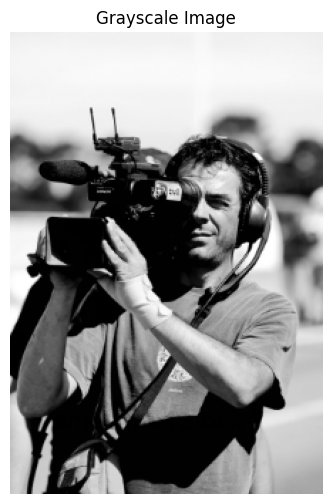

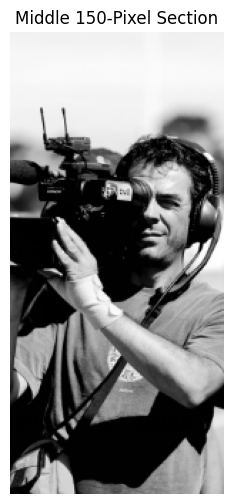

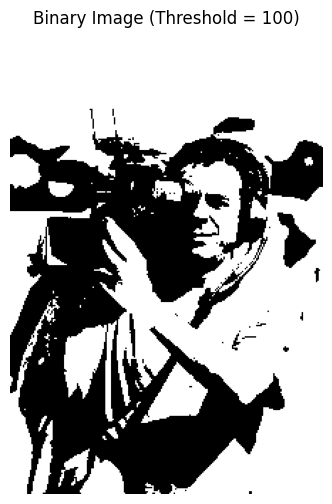

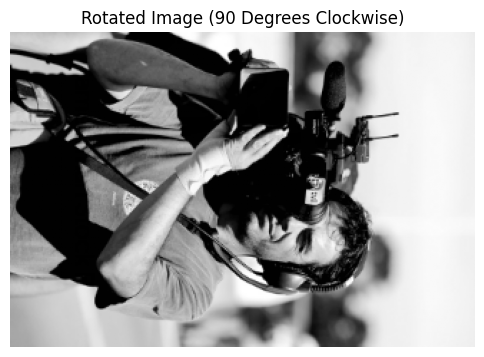

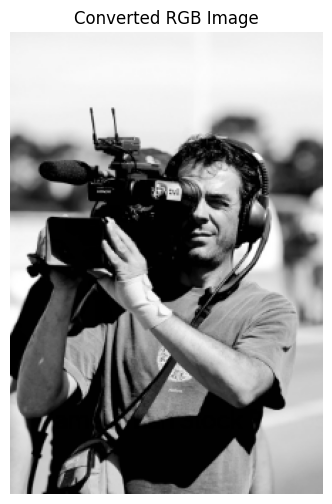

In [4]:
#2330784
#Pramdip Shrestha
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and display a grayscale image
grayscale_image_path = '/content/drive/MyDrive/Photos/camera_man.jpg'
grayscale_image = Image.open(grayscale_image_path).convert('L')
plt.figure(figsize=(6, 6))
plt.imshow(grayscale_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Extract and display the middle 150-pixel section
grayscale_array = np.array(grayscale_image)
height, width = grayscale_array.shape
mid_section = grayscale_array[:, width//2 - 75:width//2 + 75]
plt.figure(figsize=(6, 6))
plt.imshow(mid_section, cmap='gray')
plt.title("Middle 150-Pixel Section")
plt.axis("off")
plt.show()

# Apply thresholding to create a binary image
binary_image = np.where(grayscale_array < 100, 0, 255).astype(np.uint8)
plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image (Threshold = 100)")
plt.axis("off")
plt.show()

# Rotate the grayscale image 90 degrees clockwise
rotated_image = np.rot90(grayscale_array, k=-1)  # k=-1 for 90 degrees clockwise
plt.figure(figsize=(6, 6))
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image (90 Degrees Clockwise)")
plt.axis("off")
plt.show()

# Convert grayscale image to RGB
rgb_image = np.stack([grayscale_array]*3, axis=-1)
plt.figure(figsize=(6, 6))
plt.imshow(rgb_image)
plt.title("Converted RGB Image")
plt.axis("off")
plt.show()


3 Image Compression and Decompression using PCA.
In this exercise, build a PCA from scratch using explained variance method for image compression task.
You are expected to compute the necessary matrices from the scratch. Dataset: Use image of your
choice.
1. Load and Prepare Data:
• Fetch an image of you choice.{If colour convert to grayscale}
• Center the dataset - Standaridze the Data.
• Calculate the covaraince matrix of the Standaridze data.
2. Eigen Decomposition and Identifying Principal Components:
• Compute Eigen Values and Eigen Vectors.
• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
the highest eigenvalues.
• Identify the Principal Components with the help of cumulative Sum plot.
3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

• Display the Results and Evaluate.

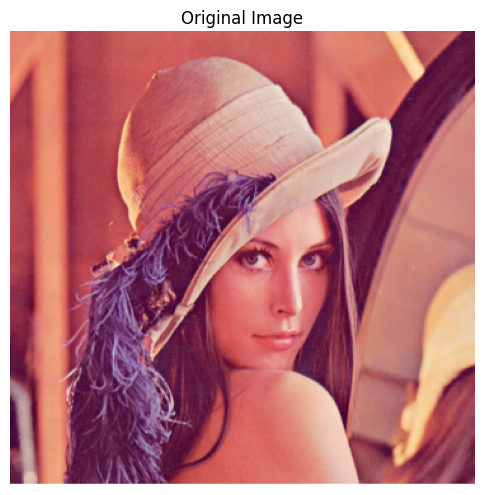

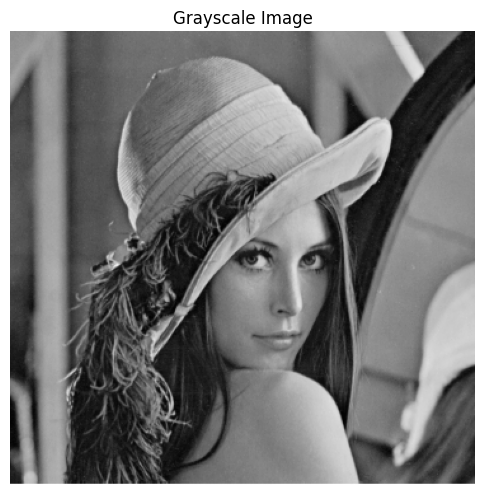

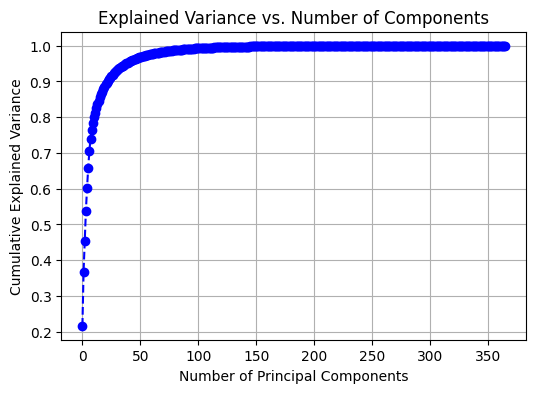

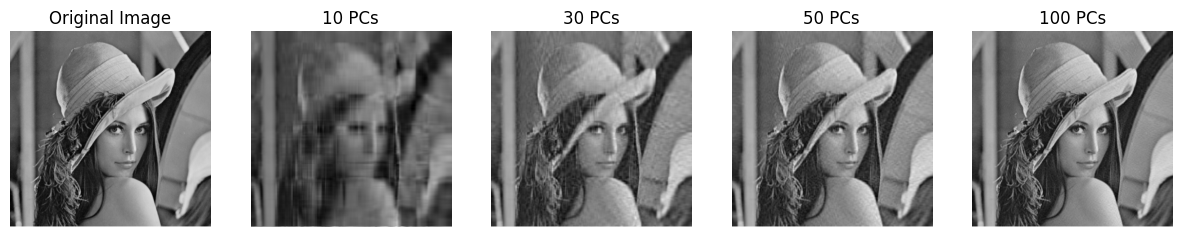

In [5]:
#2330784
#Pramdip Shrestha
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# now, Loading and displaying the original color image
image_path = '/content/drive/MyDrive/Photos/lenna_image.png'
image = Image.open(image_path)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

# so, Converting to grayscale
grayscale_image = image.convert('L')
plt.figure(figsize=(6, 6))
plt.imshow(grayscale_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Converting image to numpy array
gray_array = np.array(grayscale_image, dtype=np.float32)

# to Standardize the data
mean = np.mean(gray_array, axis=0)
std = np.std(gray_array, axis=0)
standardized_data = (gray_array - mean) / std

# Compute covariance matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Compute explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative variance
plt.figure(figsize=(6, 4))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()

# Experiment with different numbers of principal components
components_list = [10, 30, 50, 100]
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes[0].imshow(gray_array, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

for i, k in enumerate(components_list):
    pca = PCA(n_components=k)
    transformed = pca.fit_transform(standardized_data)
    reconstructed = pca.inverse_transform(transformed)
    reconstructed_image = (reconstructed * std) + mean  # De-standardizing
    axes[i + 1].imshow(reconstructed_image, cmap='gray')
    axes[i + 1].set_title(f"{k} PCs")
    axes[i + 1].axis("off")

plt.show()
